# Linear regression with one variable

Primeira semana do curso do Andrew ng do Coursera. Implementação do primeiro algoritimo.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/dbatists/Documents/datasets/ex1data1.txt', header=None)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training exammples

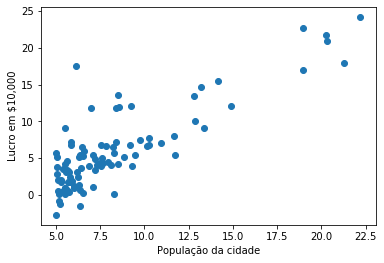

In [5]:
plt.scatter(X, y)
plt.xlabel('População da cidade')
plt.ylabel('Lucro em $10,000')
plt.show()

In [6]:
X = X[:,np.newaxis] # add a new dimension to np.array
y = y[:,np.newaxis] # add a new dimension to np.array

theta = np.zeros([2,1]) #Initialize thetas
iterations = 1500 #Gradient interactions
alpha = 0.005 #Alpha
ones = np.ones((m, 1)) #Create a matrix of ones to become the intercept term
X = np.hstack((ones, X)) #adding the intercept term to the matrix

## Computing the cost

\begin{align}
    \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2
\end{align}


In [7]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) -y #np.dot calcs the product of matrixs
    return np.sum(np.power(temp, 2)) / (2*m)

J = computeCost(X, y, theta)
print(J)

32.072733877455676


## Finding the optimal parameters using Gradient Descent



\begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}


In [8]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        #print('checando a propriedade da matriz {0}'.format(temp))
        temp = np.dot(X.T, temp)
        theta = theta - (alpha / m) * temp
        
        cost_history[_] =  computeCost(X, y, theta)
        theta_history[_,:] = theta.T
        
    return theta, cost_history, theta_history

theta, cost_history, theta_history = gradientDescent(X, y, theta, alpha, iterations)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -2.868,
Theta1:          1.090
Final cost/MSE:  4.573


## plot the cost history over iterations

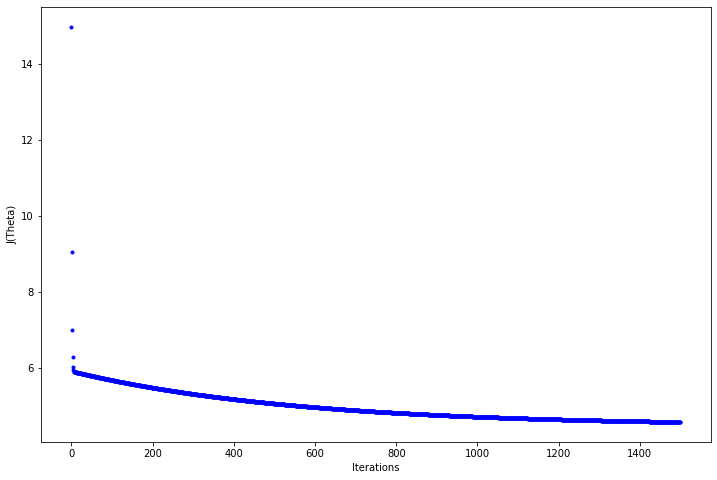

In [9]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations), cost_history,'b.')

## The best fit line plot

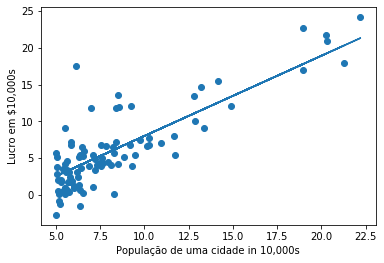

In [10]:
plt.scatter(X[:, 1], y)
plt.xlabel('População de uma cidade in 10,000s')
plt.ylabel('Lucro em $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.savefig('graph.png')
plt.show()

# Linear Regression with multiple variables


In [11]:
import numpy as np
import pandas as pd
data = pd.read_csv('C:/Users/dbatists/Documents/datasets/ex1data2.txt', header=None)

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
m = len(y)

data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Feature normalization

In [12]:
X = (X - np.mean(X)) / np.std(X)
X.head()

,0,1
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [13]:
ones = np.ones((m, 1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3, 1))
y = y[:, np.newaxis]

In [14]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


In [18]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    
    m = len(y)
    cost_history_multi = np.zeros(iterations)

    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha / m) * temp
        
        cost_history_multi = computeCostMulti(X, y, theta)
    return theta, cost_history

theta, cost_history_multi = gradientDescentMulti(X, y, theta, alpha, num_iters)

print(theta)

[[340302.97100295]
 [107744.19899198]
 [ -4875.11193358]]


In [16]:
J = computeCostMulti(X, y, theta)
print(J)

2105448288.6292474
